In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 준비

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'

In [3]:
pd.read_csv(uci_path,header = 0)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df = pd.read_csv(uci_path,header = 0)

In [5]:
# EDA

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# 데이터 전처리

x = df.iloc[:,:]

In [10]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [11]:
x

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [12]:
# K means

from sklearn import cluster

In [15]:
# 모델 생성
model = cluster.KMeans(n_clusters=5, n_init=10)

In [16]:
# 모델 학습
model.fit(x)

KMeans(n_clusters=5)

In [18]:
# 예측 (군집)

df['cluster'] = model.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


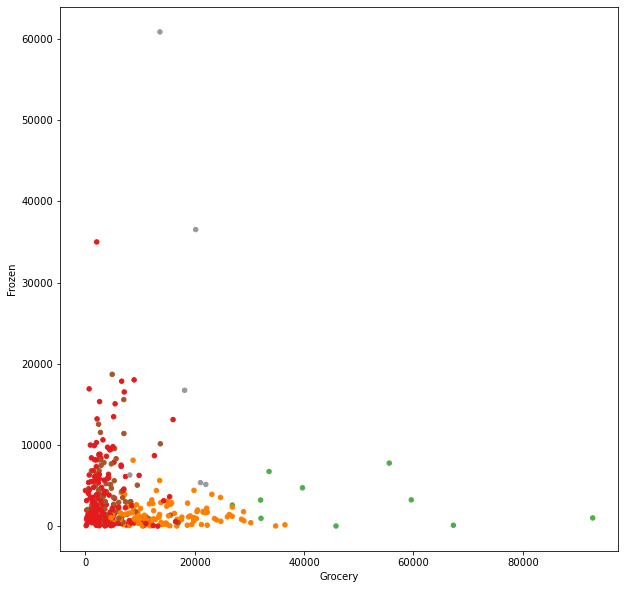

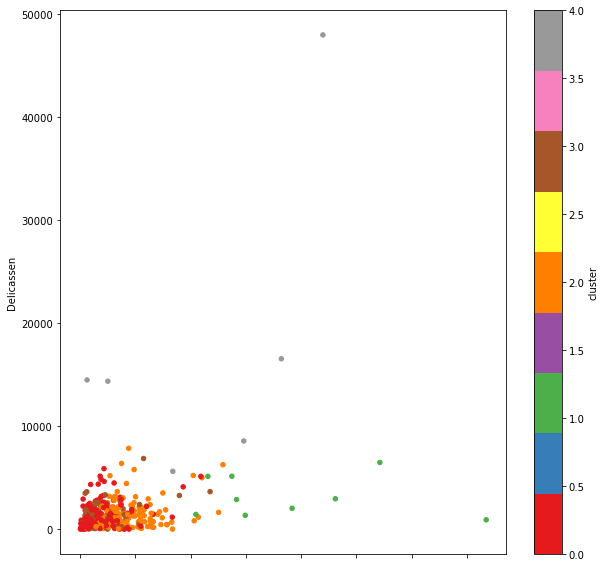

In [20]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

In [22]:
df.cluster.value_counts()

0    207
2    126
3     91
1     10
4      6
Name: cluster, dtype: int64

In [27]:
# 큰 값으로 구성된 클러스터 0, 2
mask = (df['cluster'] == 0) | (df['cluster'] == 2) # 큰 값을 가진 것을 mask로 생성
ndf = df[~mask]

In [28]:
ndf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,2,3,26373,36423,22019,5154,4337,16523,4
47,2,3,44466,54259,55571,7782,24171,6465,1
56,2,3,4098,29892,26866,2616,17740,1340,1
61,2,3,35942,38369,59598,3254,26701,2017,1
65,2,3,85,20959,45828,36,24231,1423,1
...,...,...,...,...,...,...,...,...,...
334,2,2,16823,928,2743,11559,332,3486,3
336,1,2,13970,1511,1330,650,146,778,3
337,1,2,9351,1347,2611,8170,442,868,3
338,1,2,3,333,7021,15601,15,550,3


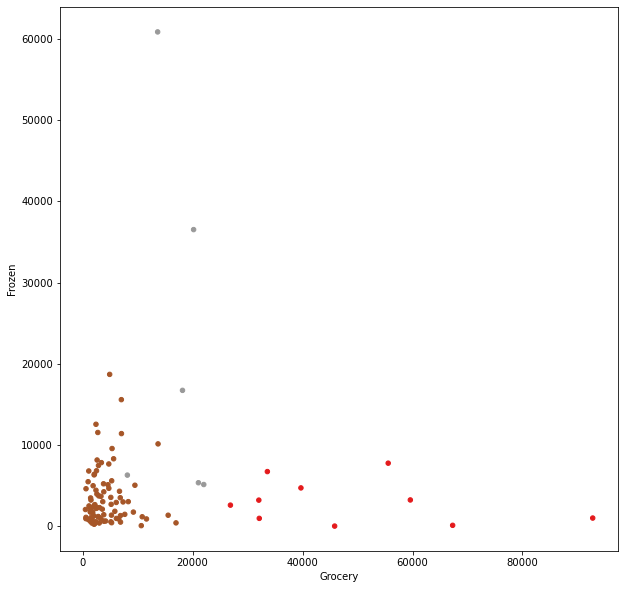

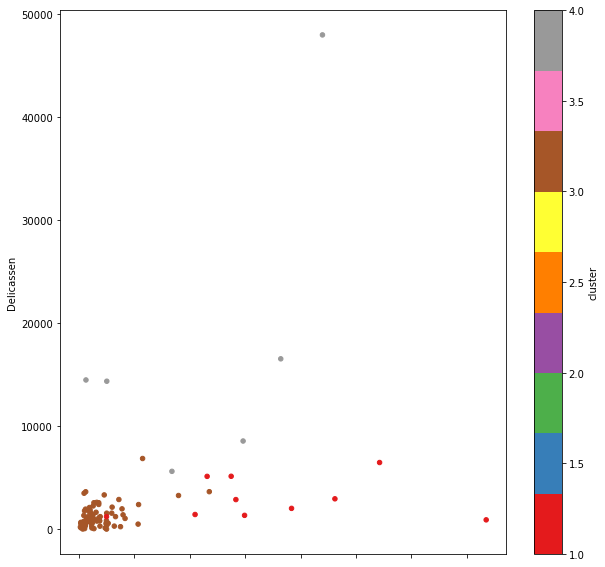

In [29]:
# 작은 값만 봄 (1,3,4)
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()